In [1]:
%pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch

In [3]:
import os
import cv2

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5

# Navigate into the cloned repository
%cd yolov5

# Install required Python packages
!pip install -qr requirements.txt

# Upgrade Shapely to the latest version (optional)
!pip install shapely --upgrade

# Install numpy version 1.25.0
!pip install numpy==1.25.0


E:\miniproject\yolov5


Cloning into 'yolov5'...


In [1]:
%pip install torch


Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch  # Import the torch library

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # use YOLOv5s


Using cache found in C:\Users\LIPI U S/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-23 Python-3.10.0 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [2]:
# Define a function to detect animals in an image
def detect_animals(image_path, model):
    # Load image
    img = cv2.imread(image_path)
    # Perform inference
    results = model(img)
    # Extract results
    labels = results.names
    detected_animals = [labels[int(x[5])] for x in results.xyxy[0]]
    return detected_animals

In [3]:
from PIL import Image


Using cache found in C:\Users\LIPI U S/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-23 Python-3.10.0 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Enter the path to the image file:  C:\Users\LIPI U S\Downloads\6.jpg


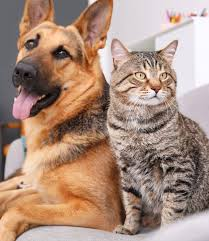

Detected 1 animals:
  - cat (Confidence: 0.49), Diet: omnivore


In [6]:
import os
import torch
from PIL import Image
from IPython.display import display

# Function to detect animals in an image
def detect_animals(image_path, model):
    # Load the image
    img = Image.open(image_path)
    
    # Perform inference
    results = model(img)
    
    # Animal categories based on diet
    carnivores = ['cheetah', 'lion', 'leopard', 'tiger', 'jaguar', 'wolf', 'fox']
    omnivores = ['cat', 'bear', 'dog']
    herbivores = ['cow', 'deer', 'donkey', 'elephant', 'goat', 'gorilla', 
                  'horse', 'kangaroo', 'panda', 'sheep', 'zebra']
    
    # Extract detected animals
    detected_animals = []
    for result in results.xyxy[0]:  # xyxy format
        label = results.names[int(result[5])]  # Label
        if label.lower() in carnivores:
            diet = 'carnivore'
        elif label.lower() in omnivores:
            diet = 'omnivore'
        elif label.lower() in herbivores:
            diet = 'herbivore'
        else:
            diet = 'unknown'  # Handle unknown animals
        
        detected_animals.append({
            'label': label,
            'confidence': float(result[4]),
            'bbox': result[:4].tolist(),
            'diet': diet
        })
    
    return detected_animals, img

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Ask user for the image file path
image_path = input("Enter the path to the image file: ").strip()

# Check if the provided path is valid
if not os.path.isfile(image_path):
    print(f"Error: The file '{image_path}' does not exist.")
else:
    # Detect animals in the specified image
    detected_animals, img = detect_animals(image_path, model)

    # Display the image using IPython.display
    display(img)

    # Print the detected animals below the image
    if detected_animals:
        num_animals = len(detected_animals)
        print(f"Detected {num_animals} animals:")
        for animal in detected_animals:
            print(f"  - {animal['label']} (Confidence: {animal['confidence']:.2f}), Diet: {animal['diet']}")
    else:
        print("No animals detected in the image.")


In [ ]:
"C:\Users\LIPI U S\Downloads\dog.jpg"

In [ ]:
C:\Users\LIPI U S\Downloads\6.jpg